# **Churn Analysis**

## **Business Understanding**

In today's competitive landscape, understanding and effectively managing customer churn is paramount for businesses aiming to sustain growth and profitability. A churn predictive model serves as a valuable tool in this endeavor by providing insights into customer behavior and predicting which customers are likely to discontinue their relationship with the company

The business understanding of a churn predictive model encompasses several key aspects:

**Identification of Churn Factors:** By analyzing historical data and customer interactions, businesses can identify the key factors that contribute to churn. These factors may include customer demographics, purchase history, usage patterns, satisfaction levels, and engagement metrics. Understanding these factors allows businesses to tailor their retention strategies to address specific customer needs and preferences.

**Proactive Intervention:** One of the primary objectives of a churn predictive model is to enable proactive intervention. By accurately identifying customers at risk of churn, businesses can implement targeted retention efforts to mitigate the likelihood of defection. This may involve offering personalized incentives, providing enhanced customer support, or introducing new product features to enhance customer satisfaction and loyalty.

**Resource Allocation:** A churn predictive model helps businesses optimize resource allocation by focusing their retention efforts on customers who are most likely to churn. By prioritizing high-risk customers, businesses can allocate their time, budget, and resources more effectively, resulting in a higher return on investment for their retention initiatives.

**Customer Lifetime Value:** Understanding churn dynamics is crucial for estimating and maximizing customer lifetime value (CLV). By accurately predicting churn, businesses can identify opportunities to extend customer relationships, increase repeat purchases, and maximize revenue potential over the long term.

## **Problem Statement**

Customer churn presents a significant challenge for businesses across various industries, leading to revenue loss and decreased market share. In order to mitigate this issue, there is a critical need to develop an effective churn prediction model that can accurately forecast which customers are at risk of leaving. This model should enable companies to intervene proactively with targeted retention efforts, thereby reducing churn rates and improving overall customer retention.

## **Main Objective**
Develop a reliable and precise predictive models capable of forecasting customer churn risks, enabling companies to intervene with tailored retention measures before customers defect. Utilize insights from these models to devise and execute impactful retention strategies, including targeted marketing initiatives, personalized incentives, enhanced customer service, and product enhancements.

### Specific Objectives
---

1. **Data preprocessing:** Cleanse and preprocess the data to handle missing values, outliers, and inconsistencies, ensuring the accuracy and  reliability of the predictive model.

2. **Feature selection:** Select relevant features that have a significant impact on churn prediction while reducing dimensionality and improving model performance.

3. **Model selection:** Evaluate various machine learning algorithms and statistical techniques to identify the most suitable model for predicting customer churn, considering factors such as accuracy, interpretability, and scalability.

4. **Model training and validation:** Train the chosen model on a subset of the data and validate its performance using cross-validation techniques to ensure generalizability and robustness.

5. **Hyperparameter tuning:** Optimize the parameters of the selected model using techniques such as grid search or random search to improve predictive accuracy and minimize overfitting.

6. **Evaluation metrics:** Define appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC), to assess the performance of the churn prediction model objectively.
---

### **Description of columns:**
---
**Here is a summary of the columns:**

**state:** The state of the customer.

**account length:** The length of the account in days or months.

**area code:** The area code of the customer's phone number.

**phone number:** The phone number of the customer.

**international plan:** Whether the customer has an international plan or not.

**voice mail plan:** Whether the customer has a voicemail plan or not.

**number vmail messages:** The number of voicemail messages the customer has.

**total day minutes:** Total minutes of day calls.

**total day calls:** Total number of day calls.

**total day charge:** Total charge for the day calls.

**total eve minutes:** Total minutes of evening calls.

**total eve calls:** Total number of evening calls.

**total eve charge:** Total charge for the evening calls.

**total night minutes:** Total minutes of night calls.

**total night calls:** Total number of night calls.

**total night charge:** Total charge for the night calls.

**total intl minutes:** Total minutes of international calls.

**total intl calls:** Total number of international calls.

**total intl charge:** Total charge for the international calls.

**customer service calls:** Number of times the customer called customer service.

**churn:** Whether the customer churned or not (True/False).

In [276]:
# importing the neccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaseEnsemble
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer, recall_score, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline

## **Exploratory Data Analysis EDA**

In [231]:
df = pd.read_csv("dataset/dataset.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [232]:
df.shape

(3333, 21)

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [234]:
# Checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

* There are no missing values in the data set 

In [235]:
# Checking for duplicates
df.duplicated().sum()

0

In [236]:
# checking for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [237]:
df.columns.tolist()

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

## Data Visualization and Pre-Processing

* Dropping the phone number collumn because it is irrelevant to our analysis

In [238]:
# dropping the phone number
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [239]:
# checking to see if state and area code contains the same data that is coded differently
state_values = df['state'].unique()
area_code_values = df['area code'].unique()

set_state = set(state_values)
set_area = set(area_code_values)

differences = set_state.symmetric_difference(set_area)

if len(differences) == 0:
    print("The two columns contain the same data.")
else:
    print("The two columns contain different data.")
    print("Differences:", differences)

The two columns contain different data.
Differences: {'LA', 'WY', 'KY', 'KS', 'WA', 'NC', 'MI', 'ME', 'NJ', 408, 'TX', 'CT', 'RI', 'CA', 415, 'GA', 'IN', 'OK', 'IL', 'FL', 'UT', 'AL', 'VA', 'NE', 'NV', 'ND', 'NH', 'VT', 'MD', 'OH', 'WI', 'MT', 'AZ', 'MS', 'AR', 'AK', 'MA', 'HI', 'MN', 'SC', 'MO', 'PA', 'IA', 'TN', 'DE', 'DC', 'NM', 'NY', 'ID', 'WV', 'SD', 'CO', 'OR', 510}


In [240]:
# confirming that state and area code are indeed different
list(zip(df['state'], df['area code']))

[('KS', 415),
 ('OH', 415),
 ('NJ', 415),
 ('OH', 408),
 ('OK', 415),
 ('AL', 510),
 ('MA', 510),
 ('MO', 415),
 ('LA', 408),
 ('WV', 415),
 ('IN', 415),
 ('RI', 415),
 ('IA', 408),
 ('MT', 510),
 ('IA', 415),
 ('NY', 415),
 ('ID', 408),
 ('VT', 510),
 ('VA', 510),
 ('TX', 415),
 ('FL', 415),
 ('CO', 408),
 ('AZ', 415),
 ('SC', 415),
 ('VA', 510),
 ('NE', 415),
 ('WY', 408),
 ('MT', 408),
 ('MO', 415),
 ('HI', 510),
 ('IL', 415),
 ('NH', 510),
 ('LA', 408),
 ('AZ', 408),
 ('OK', 408),
 ('GA', 415),
 ('AK', 408),
 ('MA', 415),
 ('AK', 415),
 ('NJ', 408),
 ('GA', 408),
 ('MD', 408),
 ('AR', 510),
 ('ID', 415),
 ('WI', 510),
 ('OR', 408),
 ('MI', 415),
 ('DE', 408),
 ('ID', 415),
 ('WY', 415),
 ('IA', 408),
 ('IN', 408),
 ('VA', 408),
 ('UT', 415),
 ('WY', 415),
 ('IN', 408),
 ('CO', 415),
 ('CO', 408),
 ('WI', 415),
 ('OK', 408),
 ('ID', 408),
 ('CA', 415),
 ('MN', 510),
 ('SD', 408),
 ('NC', 408),
 ('WA', 415),
 ('WY', 415),
 ('MN', 408),
 ('UT', 408),
 ('TX', 510),
 ('NJ', 408),
 ('MN'

churn
False    2850
True      483
Name: count, dtype: int64


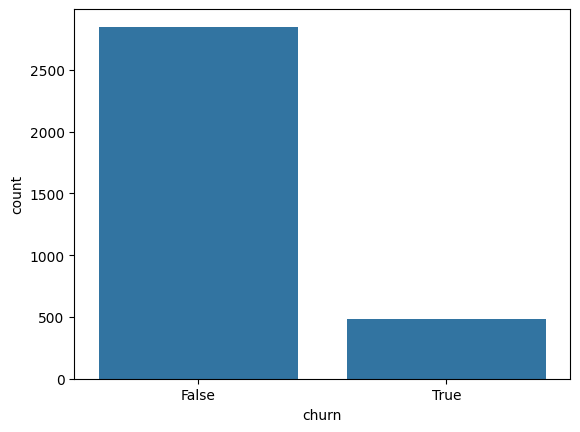

In [241]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

There is class imbalance which will be addressed before training the model

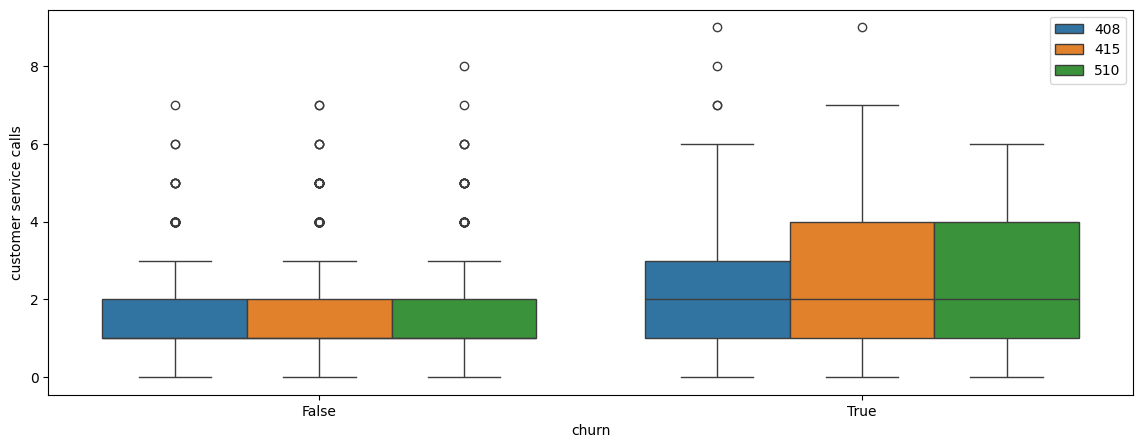

In [242]:
# Boxplot to see which area code has the highest churn rate
palette = sns.color_palette("tab10", 3)  # You can choose any color palette you prefer

plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code', palette=palette)
plt.legend(loc='upper right')
plt.show()

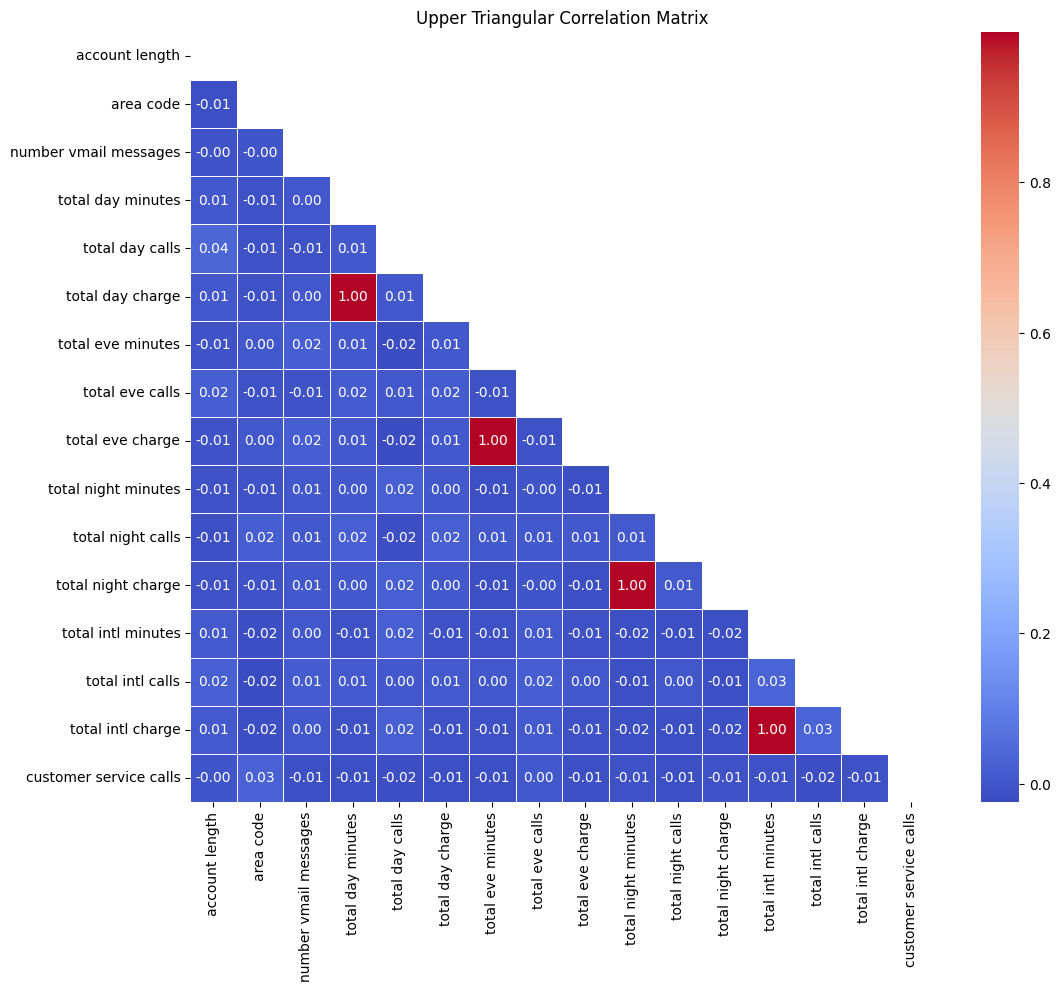

In [243]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

While most features exhibit no correlation, some demonstrate perfect correlation. 

Specifically, the features "Total day charge" and "Total day minutes," "Total eve charge" and "Total eve minutes," "Total night charge" and "Total night minutes," as well as "Total int charge" and "Total int minutes" are fully positively correlated. This perfect correlation is logical example charges directly corresponds to the minutes used. 

The correlation coefficient of 1 indicates perfect multicollinearity, which affects nonlinear models differently than linear ones. While some nonlinear models may be impacted by perfect multicollinearity, others may not be affected.

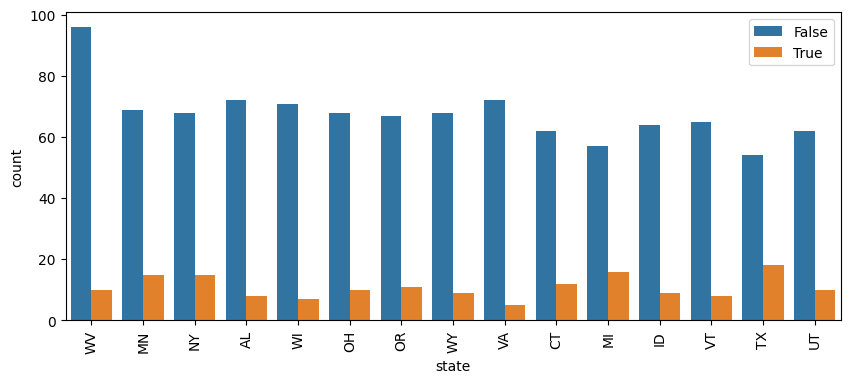

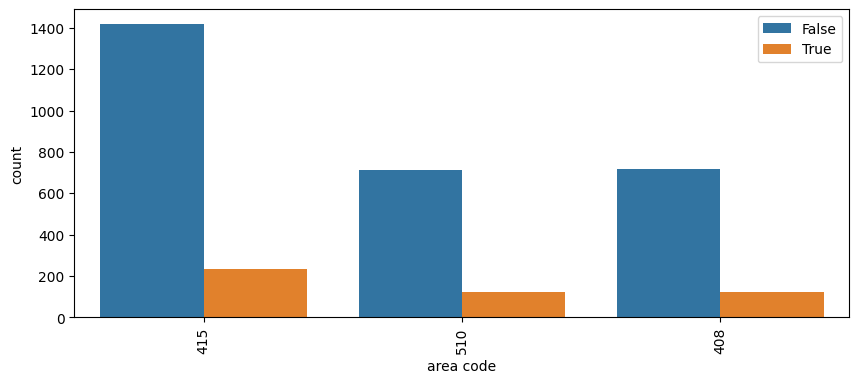

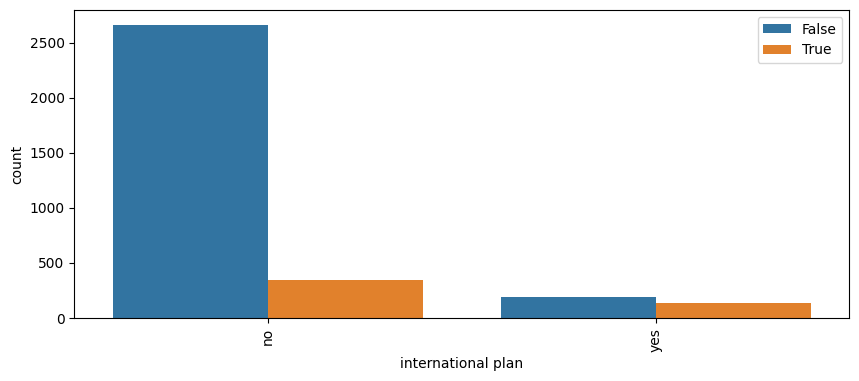

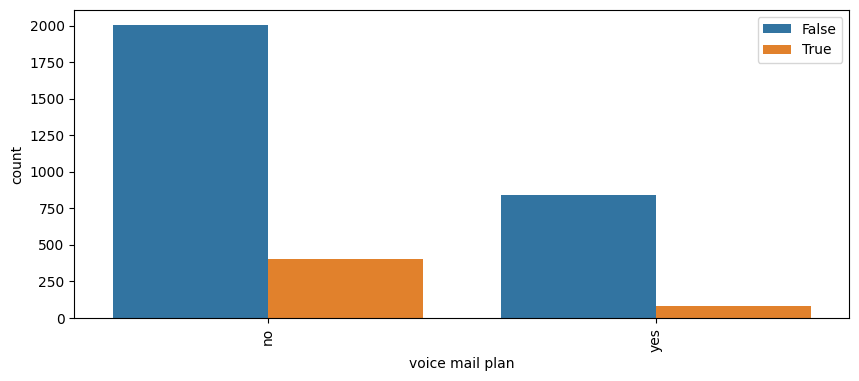

In [244]:
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue="churn", data=df, order=df[column].value_counts().iloc[:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

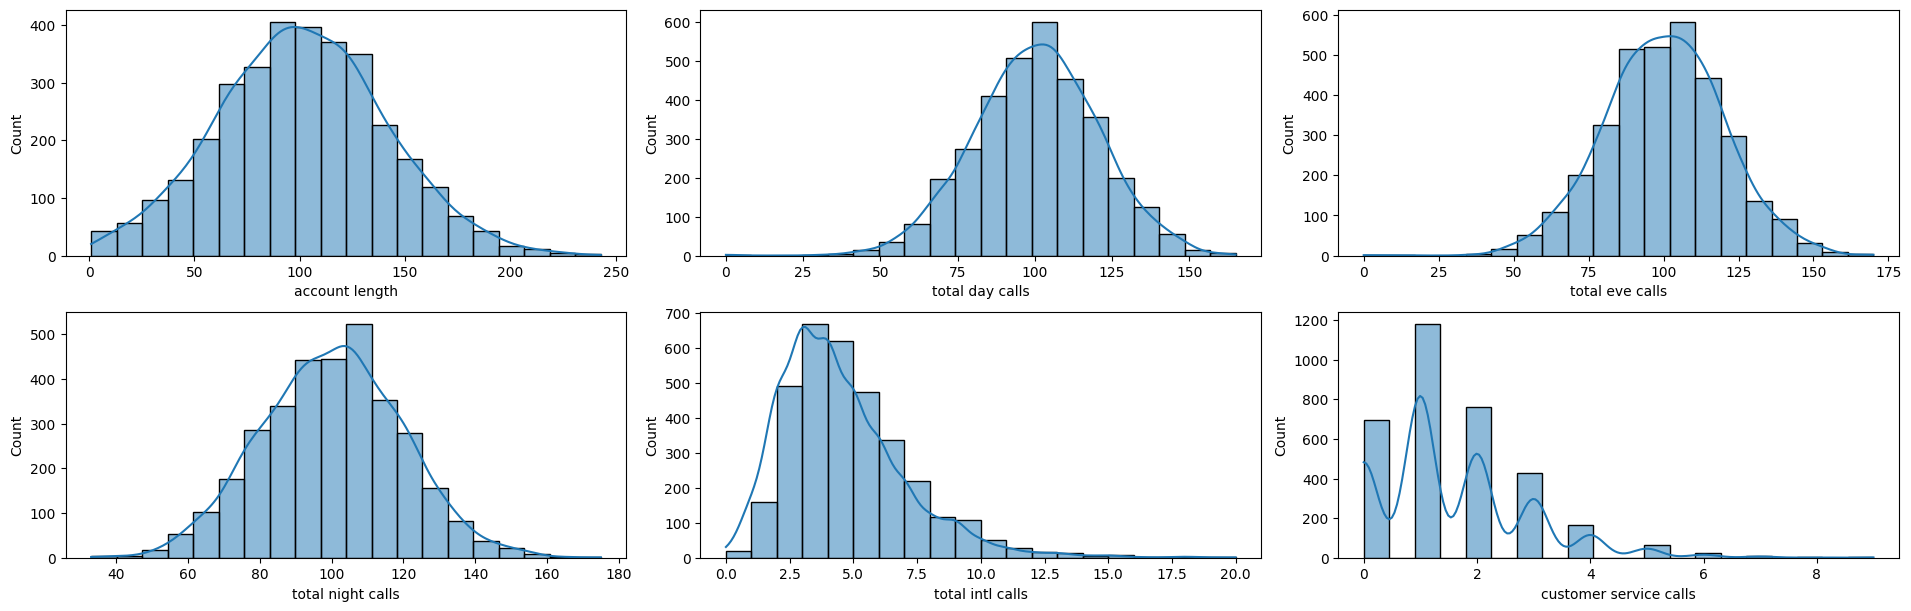

In [245]:
fig, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)

columns = ["account length", "total day calls", "total eve calls", "total night calls", "total intl calls", "customer service calls"]

for i in range(2):
    for j in range(3):
        sns.histplot(df[columns[i*3 + j]], bins=20, ax=ax[i, j], kde=True)

plt.show()

* The distribution plots reveal that all features, with the exception of customer service calls, exhibit a normal distribution. Despite being slightly skewed to the right, total international calls also demonstrate a distribution that is close to normal.

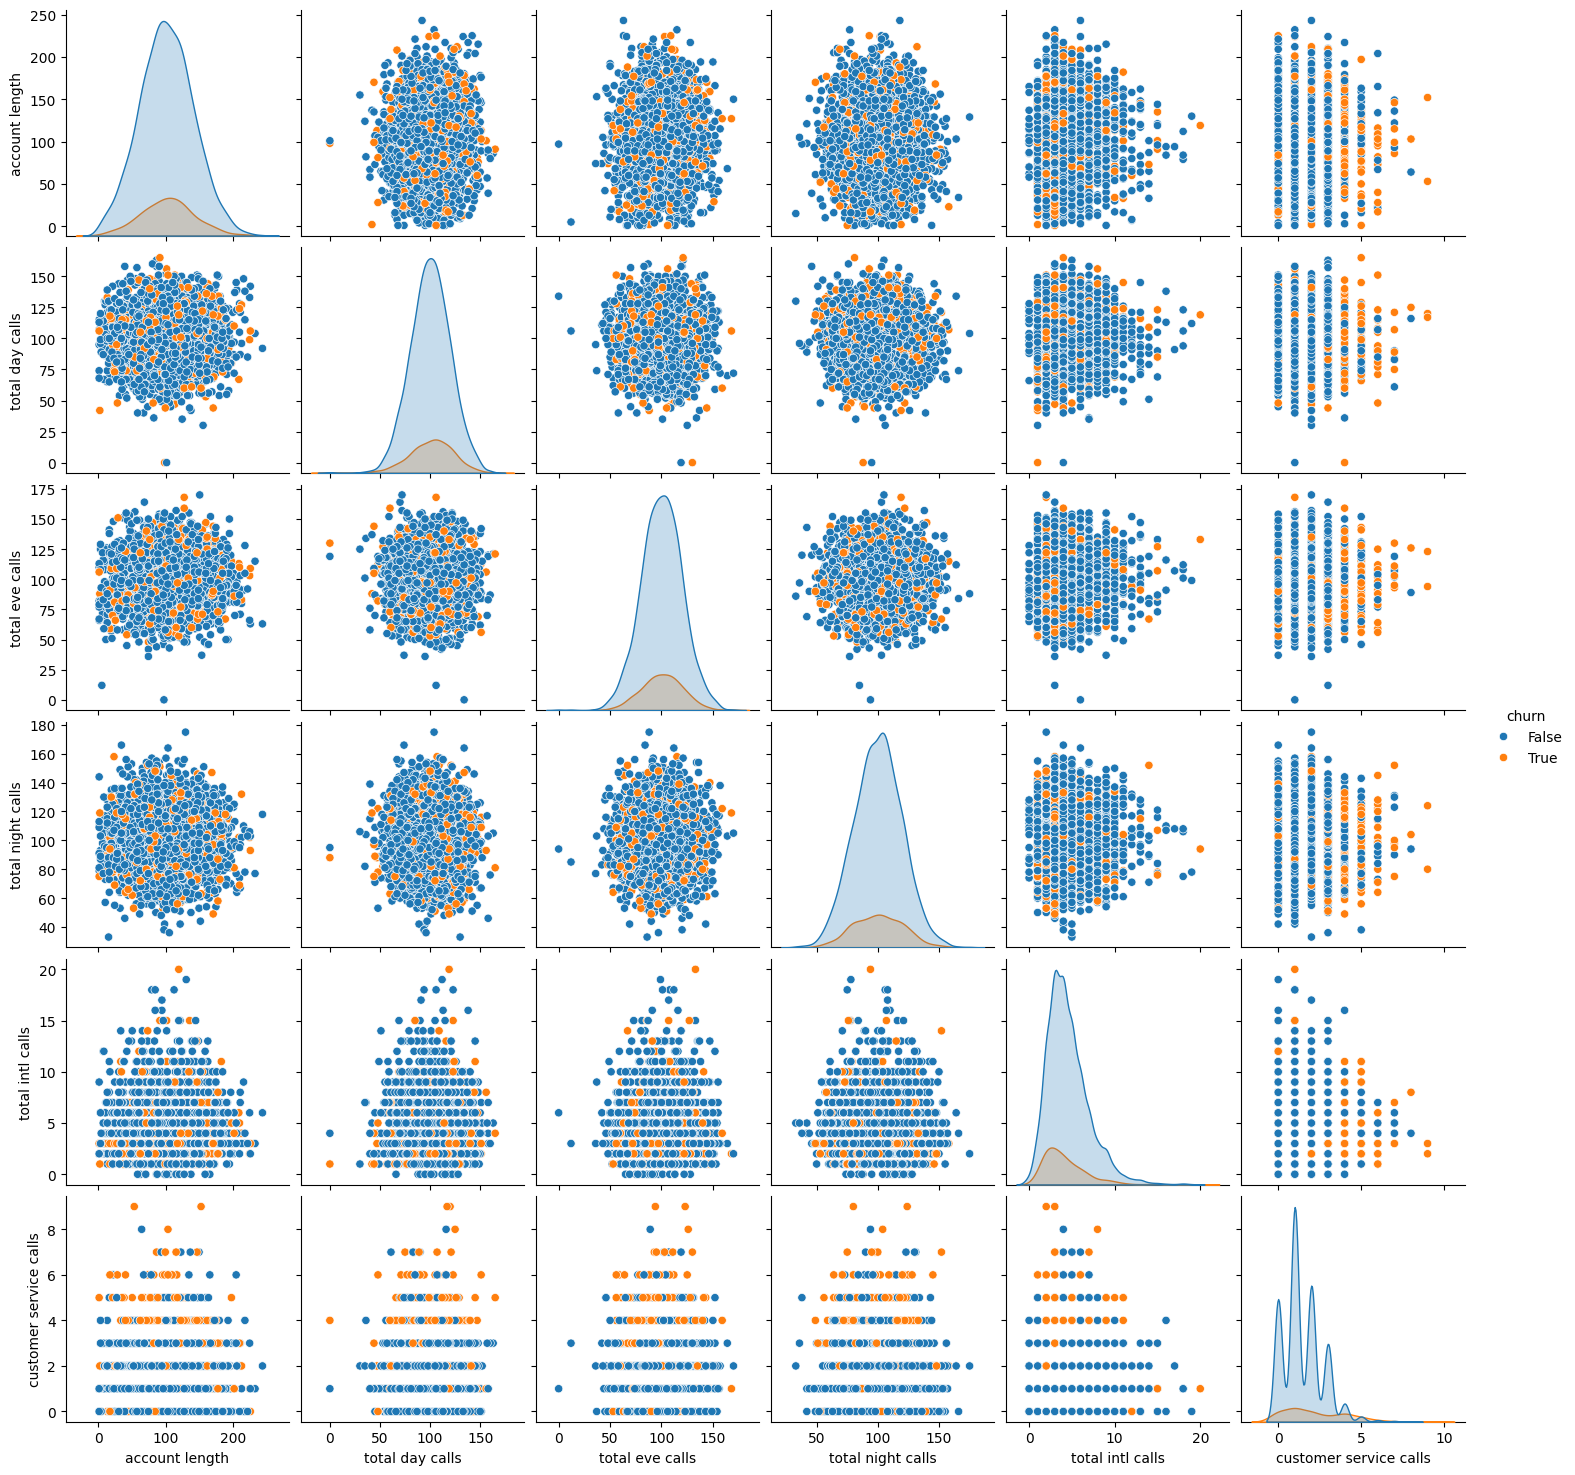

In [246]:
# Selecting specific columns from the DataFrame
selected_columns = df[["account length", "total day calls", "total eve calls", 
                       "total night calls", "total intl calls", 
                       "customer service calls", "churn"]]

# Creating a pairplot with selected columns, distinguished by churn status
sns.pairplot(selected_columns, hue="churn", height=2.5)
plt.show()

There appears to be a clear correlation between customer service calls and actual churn rates. Following four calls, customers are significantly more inclined to terminate their service.

In [247]:

df['international plan'] = df['international plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Model Development

In [258]:
y = df['churn']
X = df.drop(columns=['churn','state', 'area code'], axis=1)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [260]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1642,99,0,0,0,54.8,92,9.32,173.0,103,14.71,195.1,125,8.78,7.5,3,2.03,1
1810,124,0,0,0,194.0,103,32.98,241.0,116,20.49,227.5,153,10.24,11.9,5,3.21,0
3061,90,0,0,0,222.0,93,37.74,187.0,103,15.90,282.3,124,12.70,12.4,6,3.35,2
2428,40,0,0,0,81.7,123,13.89,210.2,108,17.87,212.0,64,9.54,11.3,3,3.05,6
1265,95,0,1,39,260.8,130,44.34,213.4,111,18.14,195.6,97,8.80,10.1,5,2.73,1


In [261]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [262]:
X_train_scaled_df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [268]:
# Use Smote to resample and fix the class imbalance problem
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_df, y_train)

In [269]:
# The distribution of target variable

print(pd.Series(y_train_resampled).value_counts())

churn
False    1995
True     1995
Name: count, dtype: int64


In [280]:
logreg = RandomForestClassifier()
logreg.fit(X_train_scaled, y_train) 

y_pred_test = logreg.predict(X_test)
y_preds_train = logreg.predict(X_train_resampled)

print('Training Recall:', recall_score(y_train_resampled, y_preds_train))
print('Testing Recall:', recall_score(y_test, y_pred_test))

Training Recall: 0.8591478696741854
Testing Recall: 0.9103448275862069


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


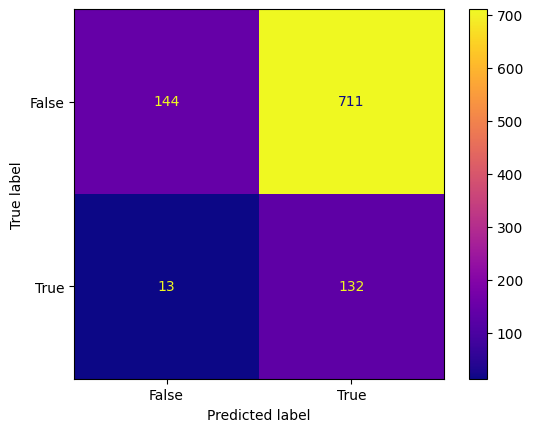

In [281]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels=logreg.classes_)
disp.plot(cmap='plasma')

plt.show()